This notebook is borrowed from Jake Vander Plas github.  Meant to illustrate cross validation and bias-variance

# 0. Imports and settings

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [9]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 6]
sns.set()

# 1 Cross-Validation

## 1.1 Data to use for this example

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
X.shape

(150, 4)

In [14]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
y.shape

(150,)

In [16]:
y[:5]

array([0, 0, 0, 0, 0])

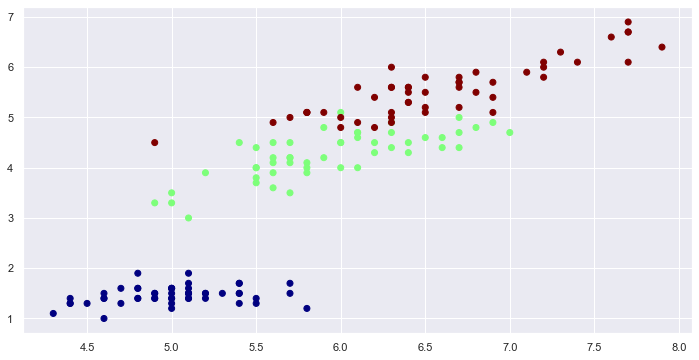

In [17]:
plt.scatter(X[:,0], X[:,2], c=y, cmap="jet")

In [18]:
cols = ['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)', 'target']

In [19]:
df = pd.DataFrame(np.concatenate((X,y[:, np.newaxis]), axis=1), columns = cols)

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


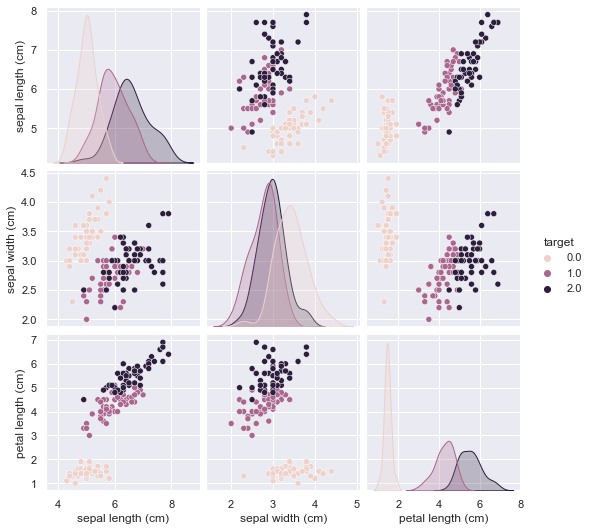

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(df, hue='target', vars=cols[:3])

## 1.2 Using KNN to illustrate CV

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

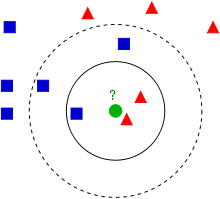

In [22]:
from sklearn.neighbors import KNeighborsClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
model = KNeighborsClassifier(n_neighbors=3, )
model2 = KNeighborsClassifier()


In [23]:
model.fit(X, y)
y_model = model.predict(X)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

0.96

See pairplot + no hold out set

In [25]:
from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [26]:
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, test_size = 0.25,train_size=0.75, )

In [27]:
150*.75

112.5

In [28]:
X1.shape

(112, 4)

In [29]:
# fit the model on one set of data from train_test_split
model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=3)

In [30]:
X2.shape

(38, 4)

In [31]:
# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9736842105263158

"2-fold cross validation" <br>
25% of the data has been eliminated in this example; let's use all of the data

In [32]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.9821428571428571, 0.9736842105263158)

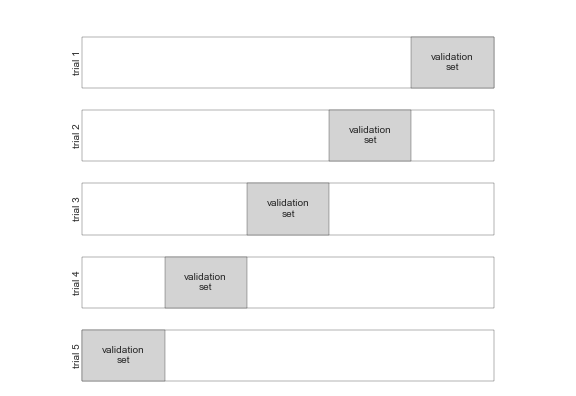


In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
model

KNeighborsClassifier(n_neighbors=3)

In [40]:
cross_val_score(model, X, y, cv=5) # This shows how well the model performs across the different number of neighbors that are generated

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [41]:
from sklearn.model_selection import LeaveOneOut

In [42]:
scores = cross_val_score(model, X, y, cv=LeaveOneOut())

In [43]:
len(scores)

150

In [44]:
X.shape

(150, 4)

In [45]:
scores.mean()

0.96

### 1.3 GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV
# pick all the different combinations of hyper parameters and train on them

In [47]:
param_grid = {'n_neighbors':[1,2,3,4,5]}

In [48]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

In [49]:
clf.fit(X,y)
# this program takes the model and our data, does the cross validation (3) 

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})

In [51]:
clf.best_params_

{'n_neighbors': 4}

In [ ]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
clf.best_params_

{'n_neighbors': 5}

In [ ]:
clf.

SyntaxError: invalid syntax (<ipython-input-59-8097f1fc138e>, line 1)

In [52]:
clf.cv_results_

{'mean_fit_time': array([0.00078472, 0.00060042, 0.00076302, 0.00120171, 0.00078066]),
 'std_fit_time': array([2.61000027e-04, 7.30350824e-05, 1.18366174e-04, 4.25348204e-04,
        1.00175406e-04]),
 'mean_score_time': array([0.00290227, 0.00260194, 0.00395139, 0.00385086, 0.00471663]),
 'std_score_time': array([0.00034664, 0.00028021, 0.00047962, 0.00074248, 0.00201754]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5}],
 'split0_test_score': array([0.98, 0.96, 0.98, 0.98, 0.98]),
 'split1_test_score': array([0.94, 0.94, 0.96, 1.  , 0.98]),
 'split2_test_score': array([0.96, 0.94, 0.98, 0.98, 0.98]),
 'mean_test_score': array([0.96      , 0.94666667, 0.97333333, 0.98666667, 0.98      ]),
 'std_test_score': array([0.01632993, 0.00942809, 0.00942809, 0.

### 1.4 Scoring

In [ ]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1')

In [ ]:
y[y!=2]

In [ ]:
clf.fit(X[y!=2],y[y!=2])